In [1]:
import mvranalysis as mvr
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob
import json
import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorsys import hsv_to_rgb, rgb_to_hsv
%matplotlib inline


//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
ID = 156
path = '/Volumes/freeman/Nick/mVR/sessions'

logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_behavior_log.xlsx'
log = pd.read_excel(logpath)

156 was run on antibias R and WaterR, where R is correct and L is incorrect

# Load sessions

In [29]:
sessions = log[(log.AnimalNum == ID)]
unbiased = sessions[(sessions.SessionType == 'unbiased')]
antibiasR = sessions[(sessions.SessionType == 'antibiasR')]
waterR = sessions[(sessions.SessionType == 'waterR')]
sessions = (pd.concat([unbiased,antibiasR, waterR])).sort()
session_vals= [int(x) for x in sessions.SessionNum]
print sessions

    AnimalNum  SessionNum SessionType
87        156         151    unbiased
88        156         155   antibiasR
89        156         157   antibiasR
90        156         160   antibiasR
91        156         162      waterR
92        156         165      waterR
93        156         169      waterR


In [30]:
prefix = []
for x in session_vals:
    if len(str(x))==2:
        pref = '/0000'
    else:
        pref = '/000'
    prefix.append(pref) 

summary = [pd.read_csv(path + prefix[x] + str(session_vals[x]) + '/summary/trial_summary' + str(session_vals[x])+ '.csv') for x in range(len(session_vals))]
#Load all sessions for an animal

[    number  trialType  reward  rEnd  lEnd  Pathlengths  choicePath  \
 0        0          0       1     0     0   102.815174   16.438367   
 1        1          0       1     0     0    91.690080   20.237664   
 2        2          0       1     0     0    97.254336   10.709595   
 3        3          0       0     0     0    91.812918   18.485418   
 4        4          0       1     0     0    92.751569   18.241912   
 5        5          0       0     0     0   107.099518   23.624041   
 6        6          0       1     0     0    94.849416   22.544572   
 7        7          0       1     0     0   103.148562   27.762784   
 8        8          0       1     0     0    98.816588   19.423887   
 9        9          0       0     0     0   100.739772   25.884264   
 10      10          0       0     0     0   101.106543   18.503388   
 11      11          0       1     0     0    90.916219   21.826270   
 12      12          0       0     0     0    88.854536   18.229736   
 13   

In [31]:
mean_trials = np.mean([(len(x))for x in summary])

In [32]:
unbiased_idx = 0
antibias_idx = [1,2,3]
water_idx = [4,5,6]
len(summary[0])

61

In [34]:
protocol_choice = [] #concatenate 
for i in range(len(summary)):
    protocol_choice += list(summary[i].initChoice)

#Classify left and Right binary
b = []
for i in protocol_choice:
    if i =='L':
        b.append(0)
    else:
        b.append(1)

# Create dot plot

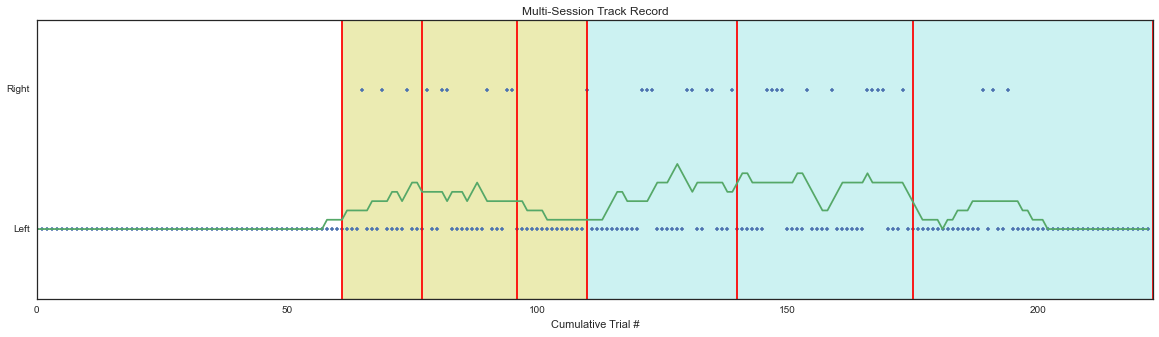

In [35]:
#Plot Correct Track Record across all sessions
plt.figure(figsize = [20,5])

len_array = []
for a in range(len(summary)):
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(b,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.xlabel('Cumulative Trial #')
plt.yticks([0,1],['Left','Right'])
plt.title('Multi-Session Track Record')


avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(b,kernel, 'same')
plt.plot(avgs) 

223 223


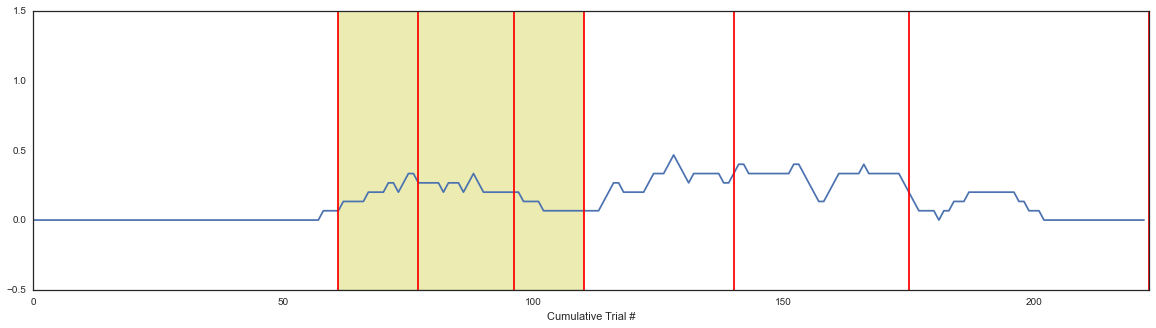

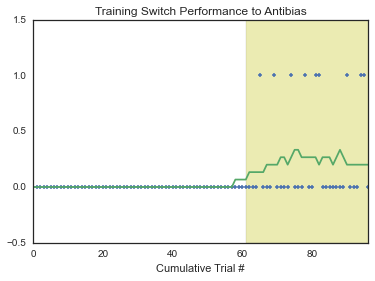

In [36]:
#Moving Average
plt.figure(figsize = [20,5])
avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(b,kernel, 'same')

print len(avgs), len(b)
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')

plt.figure(2)
plt.plot(b,'.')
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(0,len_array[2])
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.title('Training Switch Performance to Antibias')
plt.xlabel('Cumulative Trial #')

zoom = avgs[len_array[0]-40:len_array[0]+40]
zoom  = pd.Series(zoom)
#zoom.to_csv(path + "/rollingavg150.csv")



# Plot Animal Performance

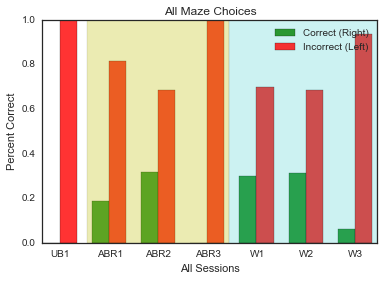

0.0 0.167763157895 0.225595238095


In [37]:
#Plot Correct (R correct, L incorrect)
c = [] #correct/right
for j in range(len(summary)):
    
    correct = list(summary[j].initChoice).count('R')
    perc_correct = correct/float(len(summary[j]))
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/left side

labels = ['UB1', 'ABR1','ABR2', 'ABR3', 'W1', 'W2', 'W3']  #All days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Right)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Left)')

plt.legend(loc='best')
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('All Sessions')
plt.ylabel('Percent Correct')
plt.title('All Maze Choices')
plt.axvspan(0.9,3.8, facecolor = 'y', alpha = 0.3)
plt.axvspan(3.8,6.8 , facecolor = 'c', alpha = 0.2)
plt.show()


mu_perc_corrUB_before = np.mean(c[0])
mu_perc_corrAB = np.mean(c[1:4])
mu_perc_corrW = np.mean(c[4:7])

print mu_perc_corrUB_before, mu_perc_corrAB, mu_perc_corrW

# Time stats

[31.946295081967214, 114.0845, 115.19221052631579, 117.45628571428573, 63.26926666666667, 53.755885714285704, 39.592666666666666]


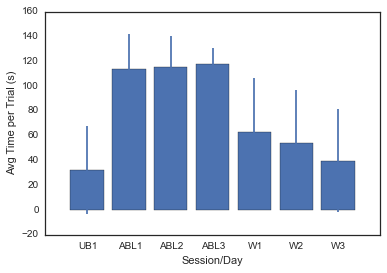

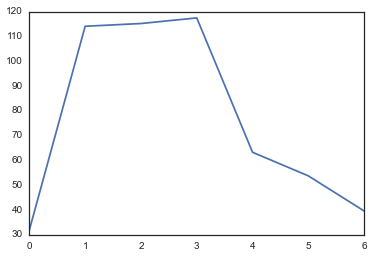

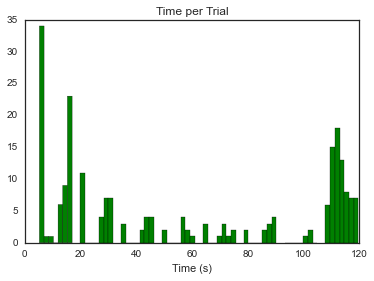

In [38]:
# Mean Time per trial
mu_time = []
std_time = []

[mu_time.append(x.time.mean()) for x in summary]
[std_time.append(x.time.std()) for x in summary]
print mu_time

plt.bar(range(0,len(mu_time)), mu_time, align = "center", yerr = std_time)

labels = ['UB1', 'ABL1', 'ABL2', 'ABL3', 'W1', 'W2','W3']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time per Trial (s)')

plt.figure(2)
plt.plot(mu_time,'-')

plt.figure(3)
t = []
[t.append(x.time) for x in summary]

plt.hist(t,8, facecolor = 'g')
plt.title('Time per Trial')
plt.xlabel('Time (s)')
            
            

[13.101409836065576, 1.8003750000000003, 1.3189473684210526, 1.4874285714285715, 15.7796, 18.61725714285714, 8.746250000000002]
[27.127846120039987, 3.2895891714113277, 1.1249668377178554, 0.4845149381337228, 23.74983610193901, 34.11830458199205, 16.609653817469233]


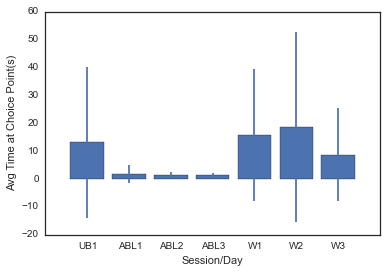

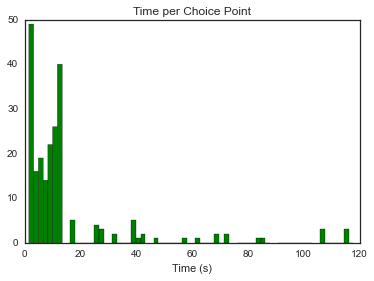

In [39]:
#Time in Choice Point
mu_choice = []
std_choice = []

[mu_choice.append(x.timeChoice.mean()) for x in summary]
[std_choice.append(x.timeChoice.std()) for x in summary]
print mu_choice
print std_choice

plt.bar(range(0,len(mu_choice)), mu_choice, align = "center", yerr = std_choice)
labels = ['UB1', 'ABL1', 'ABL2', 'ABL3', 'W1', 'W2', 'W3']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time at Choice Point(s)')

plt.figure(2)
choice = []
[choice.append(x.timeChoice) for x in summary]

plt.hist(choice,8, facecolor = 'g')
plt.title('Time per Choice Point')
plt.xlabel('Time (s)')         

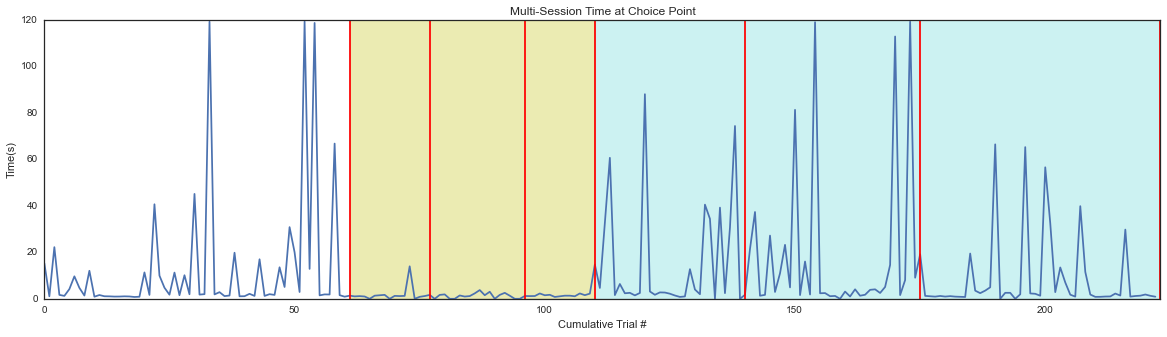

In [40]:
#Plot Choice Time acros all sessions
plt.figure(figsize = [20,5])

tchoice_array = []
len_array = []
for a in range(len(summary)):
    tchoice_array += list(summary[a].timeChoice)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')

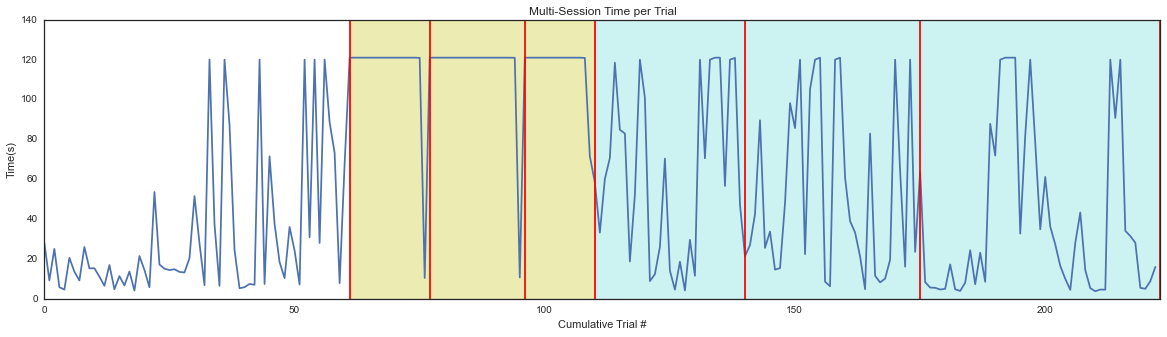

In [41]:
#Plot Trial Time acros all sessions
plt.figure(figsize = [20,5])

time_array = []
len_array = []
for a in range(len(summary)):
    time_array += list(summary[a].time)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time per Trial')

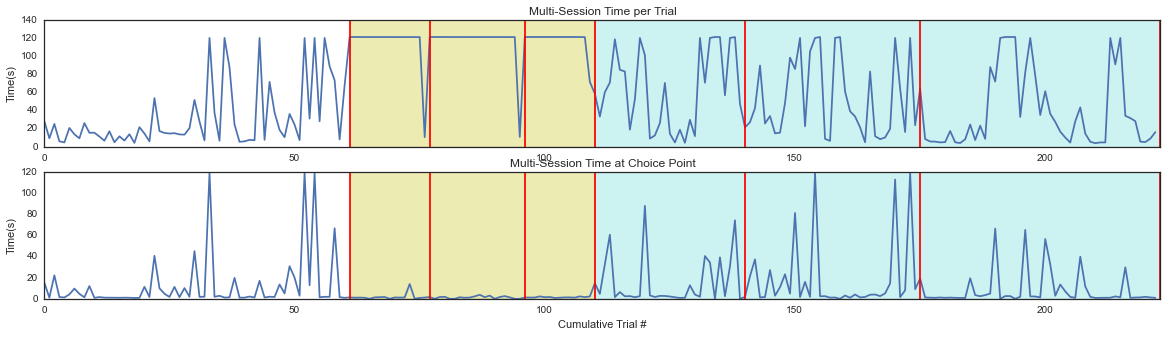

In [42]:
#Subplot
plt.figure(figsize = [20,5])
plt.subplot(211)
plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
[plt.axvline(x =a, color='r') for a in len_array]
#plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time per Trial')


plt.subplot(212)
plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')


73


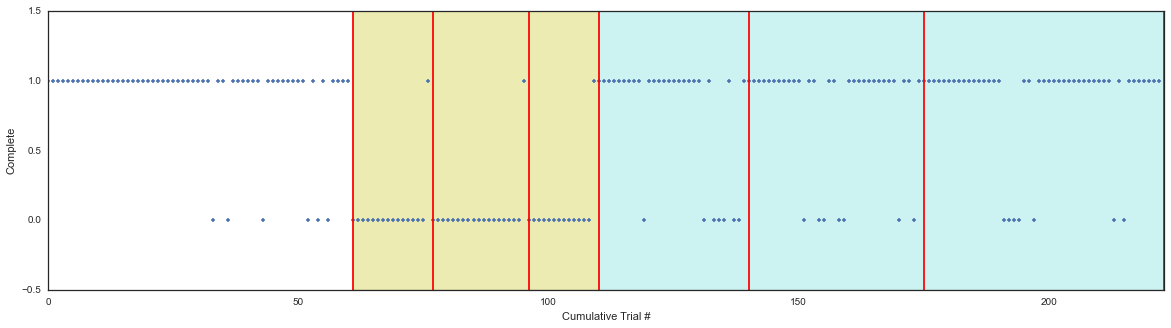

In [43]:
completion  = []
for b in range(len(summary)):
    completion += list(summary[b].Completed)
    
plt.figure(figsize = [20,5])
plt.plot(completion,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Complete')

num_incomplete = completion.count(0)
print num_incomplete

In [44]:
num_deadend = 0
for b in antibias_idx:
    num_deadend += list(summary[b].deadEnd).count(1)

In [45]:
num_deadend

38

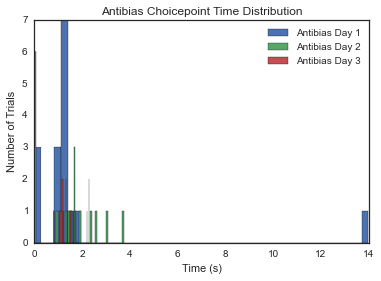

1
2
3


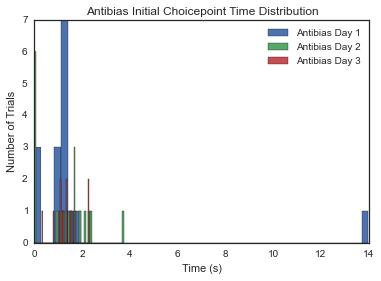

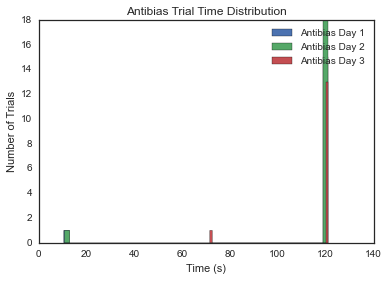

In [46]:
for i in antibias_idx:
    plt.hist(summary[i].timeChoice[~np.isnan(summary[i].timeChoice)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Choicepoint Time Distribution') 
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in antibias_idx:
    print i
    plt.hist(summary[i].initChoiceTime[~np.isnan(summary[i].initChoiceTime)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Initial Choicepoint Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].time[~np.isnan(summary[i].time)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Trial Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 




1
2
3


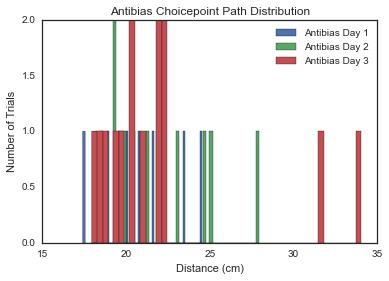

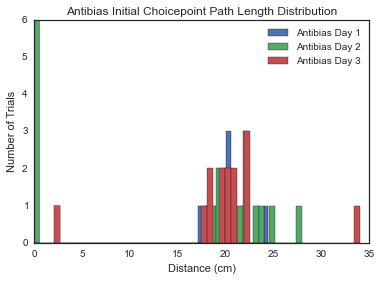

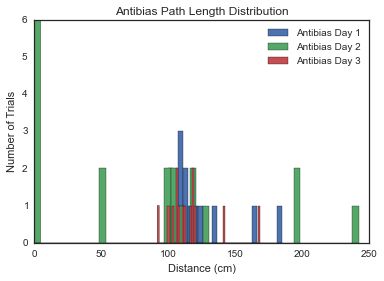

In [47]:
for i in antibias_idx:
    plt.hist(summary[i].choicePath[~np.isnan(summary[i].choicePath)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Choicepoint Path Distribution') 
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].initChoicePath[~np.isnan(summary[i].initChoicePath)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Initial Choicepoint Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in antibias_idx:
    plt.hist(summary[i].Pathlengths[~np.isnan(summary[i].Pathlengths)],50)
    plt.legend(['Antibias Day 1', 'Antibias Day 2', 'Antibias Day 3'])
plt.title('Antibias Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

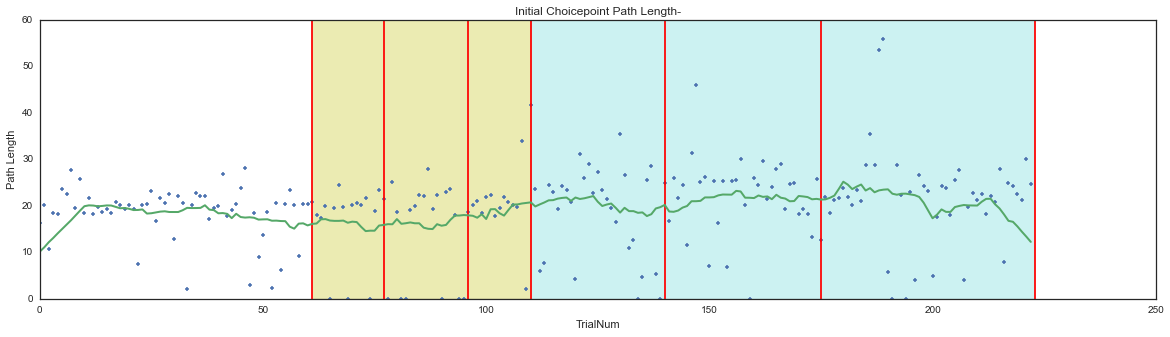

In [48]:
plt.figure(figsize = [20,5])

initpath = []
for i in range(len(summary)):
    initpath = np.append(initpath,summary[i].initChoicePath)

pathavgs = []
binsize = 20
kernel = np.ones(binsize,)/float(binsize)
pathavgs = np.convolve(initpath,kernel, 'same')
   
plt.plot(initpath,'.')
[plt.axvline(x =a, color='r') for a in len_array ]
plt.axvspan(len_array[0],len_array[3], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[3],len_array[6], facecolor = 'c', alpha = 0.2)
plt.xlabel('TrialNum')
plt.ylabel('Path Length')
plt.title('Initial Choicepoint Path Length-')
plt.plot(pathavgs,'-',linewidth = 2)
    

49
[16, 19, 14]
mean IdPhi= 8.33025641026
std IdPhi= 11.7403268458
median IdPhi= 1.195


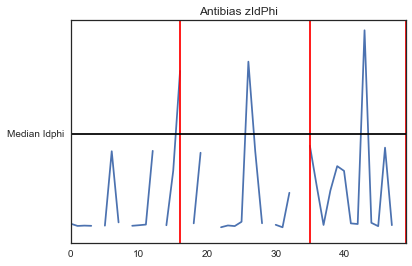

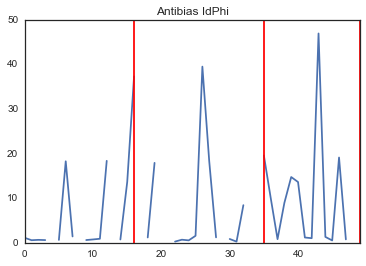

In [60]:
antibias_idphi = []
ab_array = []

for i in antibias_idx:
    antibias_idphi = np.append(antibias_idphi,summary[i].IdPhi.values)
    ab_array.append(len(summary[i]))

print len(antibias_idphi)
zidphi_3days = ((antibias_idphi - np.nanmean(antibias_idphi))/float(np.nanstd(antibias_idphi)))
print ab_array
print "mean IdPhi= "+str(np.nanmean(antibias_idphi))
print "std IdPhi= " + str(np.nanstd(antibias_idphi))
print "median IdPhi= " + str(np.nanmedian(antibias_idphi))
    
ab_array = list(np.cumsum(ab_array))

plt.plot(zidphi_3days)
plt.xlim(0,max(ab_array))
[plt.axvline(x =a, color='r') for a in ab_array ]
plt.axhline(y=np.nanmedian(antibias_idphi),color = 'k')
plt.yticks([np.nanmedian(antibias_idphi)],['Median Idphi'])
plt.title('Antibias zIdPhi')

plt.figure()
plt.plot(antibias_idphi)
plt.xlim(0,max(ab_array))
[plt.axvline(x =a, color='r') for a in ab_array ]
plt.title('Antibias IdPhi')


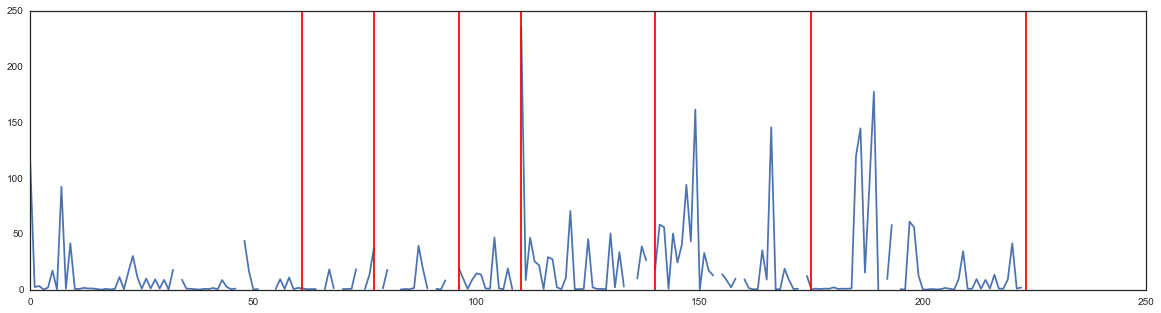

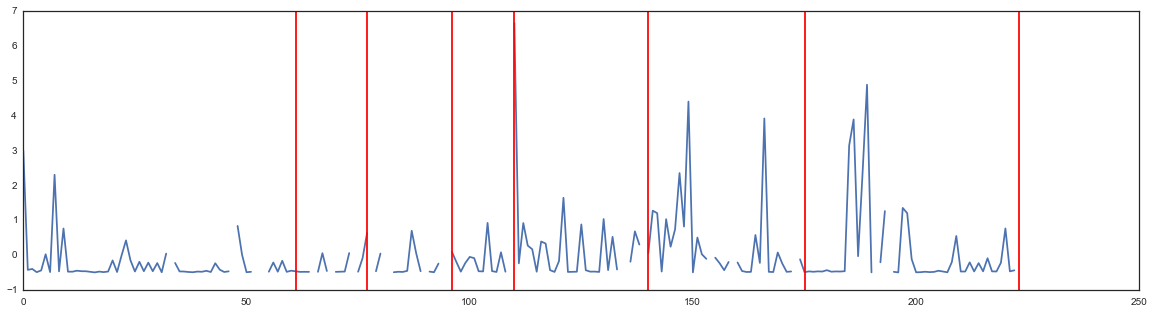

In [50]:
all_idphi = []
all_zidphi = []
for i in range(len(summary)):
    all_idphi = np.append(all_idphi,summary[i].IdPhi.values) 
    
all_zidphi = ((all_idphi - np.nanmean(all_idphi))/float(np.nanstd(all_idphi)))

plt.figure(figsize = [20,5])
plt.plot(all_idphi)
[plt.axvline(x =a, color='r') for a in len_array ]

plt.figure(figsize = [20,5])
plt.plot(all_zidphi)
[plt.axvline(x =a, color='r') for a in len_array ]
        
    

# # WaterR Analysis

113
[30, 35, 48]
mean IdPhi= 23.705903422
std IdPhi= 41.1921309357
median IdPhi= 8.64782563205
mean zIdPhi= -8.45884209238e-18


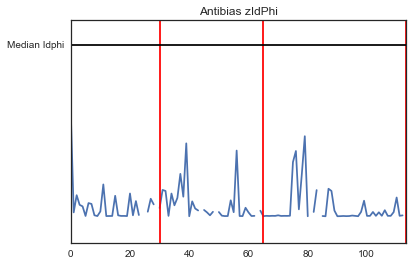

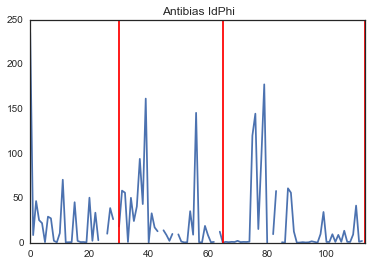

In [51]:
water_idphi = []
w_array = []

for i in water_idx:
    water_idphi = np.append(water_idphi,summary[i].IdPhi.values)
    w_array.append(len(summary[i]))

print len(water_idphi)
zidphi_water = ((water_idphi - np.nanmean(water_idphi))/float(np.nanstd(water_idphi)))
print w_array
print "mean IdPhi= "+str(np.nanmean(water_idphi))
print "std IdPhi= " + str(np.nanstd(water_idphi))
print "median IdPhi= " + str(np.nanmedian(water_idphi))
print "mean zIdPhi= "+str(np.nanmean(zidphi_water))
    
w_array = list(np.cumsum(w_array))

plt.plot(zidphi_water)
plt.xlim(0,max(w_array))
[plt.axvline(x =a, color='r') for a in w_array ]
plt.axhline(y=np.nanmedian(water_idphi),color = 'k')
plt.yticks([np.nanmedian(water_idphi)],['Median Idphi'])
plt.title('Antibias zIdPhi')

plt.figure()
plt.plot(water_idphi)
plt.xlim(0,max(w_array))
[plt.axvline(x =a, color='r') for a in w_array ]
plt.title('Antibias IdPhi')


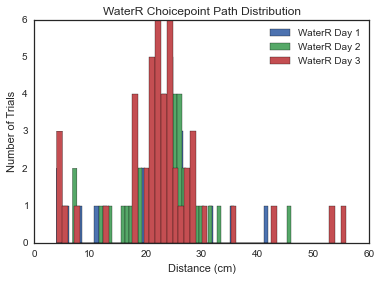

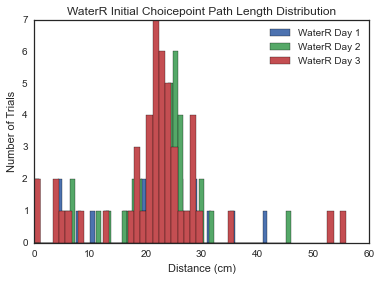

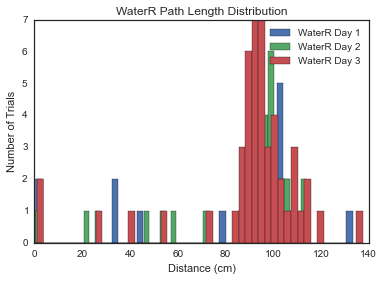

In [52]:
for i in water_idx:
    plt.hist(summary[i].choicePath[~np.isnan(summary[i].choicePath)],50)
    plt.legend(['WaterR Day 1', 'WaterR Day 2', 'WaterR Day 3'])
plt.title('WaterR Choicepoint Path Distribution') 
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in water_idx:
    plt.hist(summary[i].initChoicePath[~np.isnan(summary[i].initChoicePath)],50)
    plt.legend(['WaterR Day 1', 'WaterR Day 2', 'WaterR Day 3'])
plt.title('WaterR Initial Choicepoint Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in water_idx:
    plt.hist(summary[i].Pathlengths[~np.isnan(summary[i].Pathlengths)],50)
    plt.legend(['WaterR Day 1', 'WaterR Day 2', 'WaterR Day 3'])
plt.title('WaterR Path Length Distribution')  
plt.xlabel('Distance (cm)')
plt.ylabel('Number of Trials')
plt.show() 

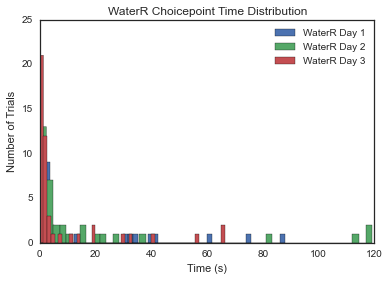

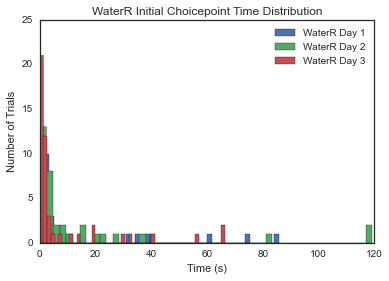

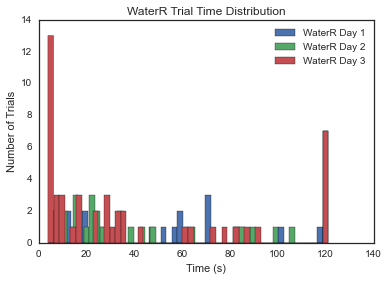

In [53]:
for i in water_idx:
    plt.hist(summary[i].timeChoice[~np.isnan(summary[i].timeChoice)],50)
    plt.legend(['WaterR Day 1', 'WaterR Day 2', 'WaterR Day 3'])
plt.title('WaterR Choicepoint Time Distribution') 
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show()  

plt.figure()
for i in water_idx:
    plt.hist(summary[i].initChoiceTime[~np.isnan(summary[i].initChoiceTime)],50)
    plt.legend(['WaterR Day 1', 'WaterR Day 2', 'WaterR Day 3'])
plt.title('WaterR Initial Choicepoint Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 

plt.figure()
for i in water_idx:
    plt.hist(summary[i].time[~np.isnan(summary[i].time)],50)
    plt.legend(['WaterR Day 1', 'WaterR Day 2', 'WaterR Day 3'])
plt.title('WaterR Trial Time Distribution')  
plt.xlabel('Time (s)')
plt.ylabel('Number of Trials')
plt.show() 

In [55]:
#Summary vals for all of an animal's sessions
animal_summary = {'Animal' :156,
                  'totalDeadEnd': num_deadend, 
                  'incomplete': num_incomplete, 
                  'meanNumTrials' : mean_trials,
                  'meanTime' : np.mean(time_array),
                  'meanChoiceTime': np.nanmean(tchoice_array),
                  'meanIdPhi': np.nanmean(all_idphi),
                  'stdIdPhi' : np.nanstd(all_idphi),
                  'meanAntibiasIdPhi' : np.nanmean(antibias_idphi),
                  'stdAntibiasIdPhi' : np.nanstd(antibias_idphi),
                  'meanWaterIdPhi' : np.nanmean(water_idphi),
                  'stdWaterIdPhi' : np.nanstd(water_idphi),
                  'meanzIdPhi' : np.nanmean(all_zidphi),
                  'stdzIdPhi': np.nanstd(all_zidphi),
                  'meanAntibiaszIdphi' : np.nanmean(zidphi_3days),
                  'stdAntibiaszIdPhi' : np.nanstd(zidphi_3days),
                  'meanWaterzIdPhi' : np.nanmean(zidphi_water),
                  'stdWaterzIdphi' : np.nanstd(zidphi_water),
                  'medianIdPhi' : np.median(all_idphi),
                  'medianzIdPhi' : np.median(all_zidphi),
                  'numDays': len(summary),
                  'correctBefore': mu_perc_corrUB_before,
                  'correctAntibias': mu_perc_corrAB,
                  'correctWater' : mu_perc_corrW}

In [56]:
animal_summary = pd.Series(animal_summary)

In [57]:
animal_summary.to_csv( path + "/animalsummary156.csv")

In [58]:
animal_summary

Animal                1.560000e+02
correctAntibias       1.677632e-01
correctBefore         0.000000e+00
correctWater          2.255952e-01
incomplete            7.300000e+01
meanAntibiasIdPhi     8.330256e+00
meanAntibiaszIdphi    0.000000e+00
meanChoiceTime        1.084613e+01
meanIdPhi             1.661591e+01
meanNumTrials         3.185714e+01
meanTime              5.958340e+01
meanWaterIdPhi        2.370590e+01
meanWaterzIdPhi      -8.458842e-18
meanzIdPhi            1.060512e-16
medianIdPhi           2.855321e+00
medianzIdPhi         -4.175340e-01
numDays               7.000000e+00
stdAntibiasIdPhi      1.174033e+01
stdAntibiaszIdPhi     1.000000e+00
stdIdPhi              3.295682e+01
stdWaterIdPhi         4.119213e+01
stdWaterzIdphi        1.000000e+00
stdzIdPhi             1.000000e+00
totalDeadEnd          3.800000e+01
dtype: float64